<a href="https://colab.research.google.com/github/jamesluttringer2019/projectsunroof/blob/master/BuildWeek1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load the data and import libraries

In [0]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [0]:
!wget https://github.com/jamesluttringer2019/projectsunroof/raw/master/google-project-sunroof.zip

--2019-11-21 16:51:51--  https://github.com/jamesluttringer2019/projectsunroof/raw/master/google-project-sunroof.zip
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jamesluttringer2019/projectsunroof/master/google-project-sunroof.zip [following]
--2019-11-21 16:51:51--  https://raw.githubusercontent.com/jamesluttringer2019/projectsunroof/master/google-project-sunroof.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18607261 (18M) [application/zip]
Saving to: ‘google-project-sunroof.zip’

google-project-sunr 100%[===================>]  17.75M  --.-KB/s    in 0.09s   

2019-11-21 16:51:52 (202 MB/s)

In [0]:
!unzip google-project-sunroof.zip

Archive:  google-project-sunroof.zip
  inflating: metadata.csv            
  inflating: project-sunroof-city-09082017.csv  
  inflating: project-sunroof-county-09082017.csv  
  inflating: project-sunroof-postal_code-09082017.csv  
  inflating: project-sunroof-state-09082017.csv  
  inflating: sunroof_solar_potential_by_censustract.csv  


# Creating the first visualization

In [0]:
#read in project sunroof data for cities
city = pd.read_csv('project-sunroof-city-09082017.csv')
print(city.shape)
city.head()


(7930, 31)


,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
0,NaN,Pennsylvania,40.701884,40.612937,-75.462191,-75.546116,40.650352,-75.495835,985.150000,7673,98.722847,84.840778,39701,113097,83193,87582,203964,32.0,527537.0,8.00,131884.25,1.002516e+07,3.514971e+07,2.304186e+07,2.454188e+07,5.992748e+07,9215.539380,1.526861e+08,"[[0,2009],[5,2674],[10,1358],[15,696],[20,286]...",97025.991471,11
1,NaN,NaN,32.551561,32.542257,-116.919812,-117.030077,32.548449,-116.956736,1300.500000,2,100.000000,66.666667,13,18,0,0,0,13.0,31.0,3.25,7.75,4.745559e+03,7.692078e+03,0.000000e+00,0.000000e+00,0.000000e+00,5209.464685,1.243764e+04,"[[0,2]]",0.000000,0
2,Aberdeen,North Carolina,35.183959,35.053605,-79.388482,-79.538347,35.143597,-79.424747,1083.750000,1078,86.098398,71.627907,3248,16681,13821,12775,92404,38.0,138929.0,9.50,34732.25,9.168585e+05,5.550471e+06,4.255421e+06,3.855701e+06,3.027457e+07,11665.383398,4.485302e+07,"[[0,250],[5,308],[10,181],[15,82],[20,35],[25,...",26330.806205,0
3,Abilene,Texas,32.614325,32.236656,-99.589583,-100.086436,32.435016,-99.750683,1252.411447,42802,97.875075,93.675042,172303,586619,403010,557991,1718095,42.0,3438018.0,10.50,859504.50,5.603976e+07,2.343579e+08,1.400185e+08,2.035497e+08,6.438137e+08,15695.829395,1.277779e+09,"[[0,5788],[5,13535],[10,10456],[15,5265],[20,2...",621366.849401,25
4,Abington,Massachusetts,42.147124,42.088107,-70.918676,-71.001744,42.116700,-70.954330,974.091632,3285,99.221868,66.056706,2145,45350,22624,25400,80334,24.0,175853.0,6.00,43963.25,5.326572e+05,1.327014e+07,5.996178e+06,6.785506e+06,2.302204e+07,6551.267090,4.960652e+07,"[[0,1270],[5,1351],[10,333],[15,80],[20,33],[2...",21479.144107,107


In [0]:
#check for null
city.isnull().sum()

region_name                              2
state_name                               1
lat_max                                  0
lat_min                                  0
lng_max                                  0
lng_min                                  0
lat_avg                                  0
lng_avg                                  0
yearly_sunlight_kwh_kw_threshold_avg     1
count_qualified                          0
percent_covered                          0
percent_qualified                        0
number_of_panels_n                       0
number_of_panels_s                       0
number_of_panels_e                       0
number_of_panels_w                       0
number_of_panels_f                       0
number_of_panels_median                 31
number_of_panels_total                  31
kw_median                               31
kw_total                                31
yearly_sunlight_kwh_n                    0
yearly_sunlight_kwh_s                    0
yearly_sunl

In [0]:
#remove the null values
city = (city[city.kw_total.notnull()])
city = (city[city.region_name.notnull()])
city.isnull().sum()

region_name                             0
state_name                              0
lat_max                                 0
lat_min                                 0
lng_max                                 0
lng_min                                 0
lat_avg                                 0
lng_avg                                 0
yearly_sunlight_kwh_kw_threshold_avg    0
count_qualified                         0
percent_covered                         0
percent_qualified                       0
number_of_panels_n                      0
number_of_panels_s                      0
number_of_panels_e                      0
number_of_panels_w                      0
number_of_panels_f                      0
number_of_panels_median                 0
number_of_panels_total                  0
kw_median                               0
kw_total                                0
yearly_sunlight_kwh_n                   0
yearly_sunlight_kwh_s                   0
yearly_sunlight_kwh_e             

In [0]:
#create df with columns needed for first visualization
city_util = city[['region_name','state_name','existing_installs_count','kw_median','kw_total']]
city_util.head()

,region_name,state_name,existing_installs_count,kw_median,kw_total
2,Aberdeen,North Carolina,0,9.50,34732.25
3,Abilene,Texas,25,10.50,859504.50
4,Abington,Massachusetts,107,6.00,43963.25
5,Abington,Pennsylvania,26,5.75,42617.25
6,Absecon,New Jersey,17,6.00,7804.75


In [0]:
# create new column which calculates the approximate current utilization 
# as a percentage of the total potential 
percent_util_form= ((city['existing_installs_count']*
                    city['kw_median'])/city['kw_total'])*100
city_util.insert(5,'percent_utilized',percent_util_form)
city_util.head()

,region_name,state_name,existing_installs_count,kw_median,kw_total,percent_utilized
2,Aberdeen,North Carolina,0,9.50,34732.25,0.000000
3,Abilene,Texas,25,10.50,859504.50,0.030541
4,Abington,Massachusetts,107,6.00,43963.25,1.460311
5,Abington,Pennsylvania,26,5.75,42617.25,0.350797
6,Absecon,New Jersey,17,6.00,7804.75,1.306896


In [0]:
#average utilization
avg_city= city_util.percent_utilized.mean()
avg_city

0.7062803873522852

In [0]:
#top 2 were bad results (biased)
top_util = city_util.sort_values('percent_utilized',ascending=False)[2:17]
top_util

,region_name,state_name,existing_installs_count,kw_median,kw_total,percent_utilized
3457,Kahaluu,Hawaii,54,5.50,819.50,36.241611
1514,Crest,California,6,20.00,465.75,25.764895
3460,Kailua,Hawaii,1092,11.00,57367.25,20.938776
3008,Heeia,Hawaii,304,12.00,17708.75,20.599986
4711,Muir Beach,California,4,6.50,131.25,19.809524
4590,Monticello,Utah,1,6.00,31.50,19.047619
6485,Silverado,California,15,16.75,1392.50,18.043088
7317,Waihee-Waiehu,Hawaii,118,9.25,6485.75,16.829202
4460,Mililani,Hawaii,2568,12.00,186090.75,16.559662
2306,Florence,Arizona,264,12.50,20079.75,16.434468


In [0]:
#merge city and state to one column
citystate = top_util['region_name']+', '+top_util['state_name']
top_util.insert(6,'city, state',citystate)
top_util.head()

,region_name,state_name,existing_installs_count,kw_median,kw_total,percent_utilized,"city, state"
3457,Kahaluu,Hawaii,54,5.5,819.50,36.241611,"Kahaluu, Hawaii"
1514,Crest,California,6,20.0,465.75,25.764895,"Crest, California"
3460,Kailua,Hawaii,1092,11.0,57367.25,20.938776,"Kailua, Hawaii"
3008,Heeia,Hawaii,304,12.0,17708.75,20.599986,"Heeia, Hawaii"
4711,Muir Beach,California,4,6.5,131.25,19.809524,"Muir Beach, California"


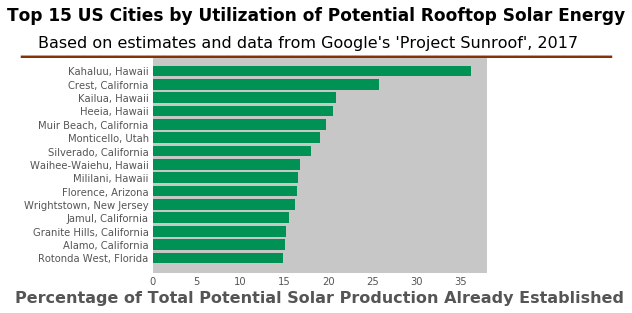

In [0]:
#create graph for top 15 cities by percent utilization
fig,ax = plt.subplots()

#set style
plt.style.use('ggplot')

#Put the largest value on top (invert the graph)
plt.gca().invert_yaxis()

#turn off gridlines
ax.grid(False)

#plot top 15 
plt.barh(top_util['city, state'],width=top_util['percent_utilized'],
         color='#009155')

#set title, subtitle, and x label
ax.set_title(
    'Top 15 US Cities by Utilization of Potential Rooftop Solar Energy',
    fontsize=17,fontweight='bold',x=.49,pad=35)
fig.text(-.14,.907,
         "Based on estimates and data from Google's 'Project Sunroof', 2017"
         ,fontsize=16)
ax.set_xlabel(
    'Percentage of Total Potential Solar Production Already Established',
              fontsize=16,fontweight='bold')
fig.text(-.18,.9,'_____________________________________',
         fontsize=31.75,color='#853209')

#edit tick marks
ax.tick_params('y',length=0)
ax.tick_params('x',length=.2)

#set graph color
ax.patch.set_facecolor('#c7c7c7')


plt.show()

#Second visualization

In [0]:
#read in state data
states=pd.read_csv('project-sunroof-state-09082017.csv')
print(states.shape)
states.head()

(52, 31)


,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
0,NaN,NaN,32.651912,32.542257,-115.667998,-117.030077,32.574314,-116.634551,1300.358333,2,75.000000,66.666667,13,18,0,0,0,13,31,3.25,7.75,4.745559e+03,7.692078e+03,0.000000e+00,0.000000e+00,0.000000e+00,5209.464685,1.243764e+04,"[[0,2]]",0.000000e+00,0
1,Alabama,Alabama,34.991768,30.187614,-84.957065,-88.412099,32.940784,-86.850699,1083.961668,700683,74.381423,78.455420,3953535,11546085,7843143,9234342,26420427,39,58997532,9.75,14749383.00,1.128360e+09,3.874097e+09,2.420185e+09,2.801916e+09,8.736817e+09,12069.322656,1.896138e+10,"[[0,137667],[5,221548],[10,148580],[15,74864],...",1.202295e+07,549
2,Alaska,Alaska,71.335131,51.851636,-131.520140,-176.657408,61.374116,-148.508058,799.534984,27583,50.685736,37.150323,11299,485483,211340,214246,1256756,29,2179124,7.25,544781.00,2.186594e+06,1.119332e+08,4.490719e+07,4.491908e+07,2.625466e+08,6540.612622,4.664927e+08,"[[0,7503],[5,10425],[10,4409],[15,1538],[20,84...",1.921975e+05,83
3,Arizona,Arizona,36.999901,31.332926,-109.045425,-114.791451,33.345498,-111.894876,1378.221736,1638999,82.343259,91.615986,4989235,24748479,15838985,21937855,47183254,47,114697808,11.75,28674452.00,1.780583e+09,1.085184e+10,6.054637e+09,8.640896e+09,1.906534e+10,18974.796637,4.639329e+10,"[[0,199346],[5,449953],[10,417070],[15,259587]...",1.991384e+07,39553
4,Arkansas,Arkansas,36.499169,33.014611,-89.730587,-94.616569,35.097736,-92.652403,1074.689511,322235,63.187435,75.680036,1624551,5384563,3402749,4316886,13401447,39,28130196,9.75,7032549.00,4.554100e+08,1.799874e+09,1.020895e+09,1.308459e+09,4.356971e+09,12099.947974,8.941609e+09,"[[0,62028],[5,98712],[10,69090],[15,34138],[20...",5.619081e+06,238


In [0]:
states.isnull().sum()

region_name                             1
state_name                              1
lat_max                                 0
lat_min                                 0
lng_max                                 0
lng_min                                 0
lat_avg                                 0
lng_avg                                 0
yearly_sunlight_kwh_kw_threshold_avg    0
count_qualified                         0
percent_covered                         0
percent_qualified                       0
number_of_panels_n                      0
number_of_panels_s                      0
number_of_panels_e                      0
number_of_panels_w                      0
number_of_panels_f                      0
number_of_panels_median                 0
number_of_panels_total                  0
kw_median                               0
kw_total                                0
yearly_sunlight_kwh_n                   0
yearly_sunlight_kwh_s                   0
yearly_sunlight_kwh_e             

In [0]:
#remove the null value
states.drop(0,axis=0,inplace=True)
states.head()

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
1,Alabama,Alabama,34.991768,30.187614,-84.957065,-88.412099,32.940784,-86.850699,1083.961668,700683,74.381423,78.455420,3953535,11546085,7843143,9234342,26420427,39,58997532,9.75,1.474938e+07,1.128360e+09,3.874097e+09,2.420185e+09,2.801916e+09,8.736817e+09,12069.322656,1.896138e+10,"[[0,137667],[5,221548],[10,148580],[15,74864],...",1.202295e+07,549
2,Alaska,Alaska,71.335131,51.851636,-131.520140,-176.657408,61.374116,-148.508058,799.534984,27583,50.685736,37.150323,11299,485483,211340,214246,1256756,29,2179124,7.25,5.447810e+05,2.186594e+06,1.119332e+08,4.490719e+07,4.491908e+07,2.625466e+08,6540.612622,4.664927e+08,"[[0,7503],[5,10425],[10,4409],[15,1538],[20,84...",1.921975e+05,83
3,Arizona,Arizona,36.999901,31.332926,-109.045425,-114.791451,33.345498,-111.894876,1378.221736,1638999,82.343259,91.615986,4989235,24748479,15838985,21937855,47183254,47,114697808,11.75,2.867445e+07,1.780583e+09,1.085184e+10,6.054637e+09,8.640896e+09,1.906534e+10,18974.796637,4.639329e+10,"[[0,199346],[5,449953],[10,417070],[15,259587]...",1.991384e+07,39553
4,Arkansas,Arkansas,36.499169,33.014611,-89.730587,-94.616569,35.097736,-92.652403,1074.689511,322235,63.187435,75.680036,1624551,5384563,3402749,4316886,13401447,39,28130196,9.75,7.032549e+06,4.554100e+08,1.799874e+09,1.020895e+09,1.308459e+09,4.356971e+09,12099.947974,8.941609e+09,"[[0,62028],[5,98712],[10,69090],[15,34138],[20...",5.619081e+06,238
5,California,California,41.997974,32.539982,-114.133090,-124.350229,35.584029,-119.433405,1276.813141,7841387,87.964252,87.051870,36861554,107828275,72399879,92215390,221717559,39,531022657,9.75,1.327557e+08,1.215200e+10,4.295210e+10,2.585561e+10,3.349004e+10,8.356659e+10,14460.077979,1.980163e+11,"[[0,1484911],[5,2508881],[10,1773721],[15,9258...",5.449561e+07,328899


In [0]:
#keep only the columns needed
states=states[['state_name','count_qualified','existing_installs_count']]
states.head()

,state_name,count_qualified,existing_installs_count
1,Alabama,700683,549
2,Alaska,27583,83
3,Arizona,1638999,39553
4,Arkansas,322235,238
5,California,7841387,328899


In [0]:
#create a new column to measure the percentage of existing buildings with solar
#vs the estimated potential number for each state
ex_to_qual = (states['existing_installs_count']/states['count_qualified'])*100
states.insert(3,'existing_to_qualified',ex_to_qual)
states.head()

,state_name,count_qualified,existing_installs_count,existing_to_qualified
1,Alabama,700683,549,0.078352
2,Alaska,27583,83,0.300910
3,Arizona,1638999,39553,2.413241
4,Arkansas,322235,238,0.073859
5,California,7841387,328899,4.194398


In [0]:
#convert state names to codes in order to format for plotly
state_to_code = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}
states = states.replace(state_to_code)
states.head()

,state_name,count_qualified,existing_installs_count,existing_to_qualified
1,AL,700683,549,0.078352
2,AK,27583,83,0.300910
3,AZ,1638999,39553,2.413241
4,AR,322235,238,0.073859
5,CA,7841387,328899,4.194398


In [0]:
#create choropleth using plotly
fig = go.Figure(
    data=go.Choropleth(                     #set graph type
        locations=states['state_name'],     #set df column for mapping
        z=states['existing_to_qualified'],  #set values to map by
        locationmode='USA-states',          #set map that matches locations
        marker_line_color='white',          #set state border color
        colorscale='darkmint',              #set colorbar range
        autocolorscale=False,                     
        colorbar_title='Percentage of<br>Solar Qualified<br>Buildings in Use'))

#adjust layout settings and preferences, then show the figure
fig.update_layout(
    title_text='Solar Equipped vs. Solar-Qualified Building Count',
     geo=dict(
         scope='usa',
         projection=go.layout.geo.Projection(type='albers usa'),
         showlakes=True,
         lakecolor='white'
     )
)


#Gather more data for the blog post

In [0]:
carbon = pd.read_csv('project-sunroof-state-09082017.csv')
carbon.head()

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
0,NaN,NaN,32.651912,32.542257,-115.667998,-117.030077,32.574314,-116.634551,1300.358333,2,75.000000,66.666667,13,18,0,0,0,13,31,3.25,7.75,4.745559e+03,7.692078e+03,0.000000e+00,0.000000e+00,0.000000e+00,5209.464685,1.243764e+04,"[[0,2]]",0.000000e+00,0
1,Alabama,Alabama,34.991768,30.187614,-84.957065,-88.412099,32.940784,-86.850699,1083.961668,700683,74.381423,78.455420,3953535,11546085,7843143,9234342,26420427,39,58997532,9.75,14749383.00,1.128360e+09,3.874097e+09,2.420185e+09,2.801916e+09,8.736817e+09,12069.322656,1.896138e+10,"[[0,137667],[5,221548],[10,148580],[15,74864],...",1.202295e+07,549
2,Alaska,Alaska,71.335131,51.851636,-131.520140,-176.657408,61.374116,-148.508058,799.534984,27583,50.685736,37.150323,11299,485483,211340,214246,1256756,29,2179124,7.25,544781.00,2.186594e+06,1.119332e+08,4.490719e+07,4.491908e+07,2.625466e+08,6540.612622,4.664927e+08,"[[0,7503],[5,10425],[10,4409],[15,1538],[20,84...",1.921975e+05,83
3,Arizona,Arizona,36.999901,31.332926,-109.045425,-114.791451,33.345498,-111.894876,1378.221736,1638999,82.343259,91.615986,4989235,24748479,15838985,21937855,47183254,47,114697808,11.75,28674452.00,1.780583e+09,1.085184e+10,6.054637e+09,8.640896e+09,1.906534e+10,18974.796637,4.639329e+10,"[[0,199346],[5,449953],[10,417070],[15,259587]...",1.991384e+07,39553
4,Arkansas,Arkansas,36.499169,33.014611,-89.730587,-94.616569,35.097736,-92.652403,1074.689511,322235,63.187435,75.680036,1624551,5384563,3402749,4316886,13401447,39,28130196,9.75,7032549.00,4.554100e+08,1.799874e+09,1.020895e+09,1.308459e+09,4.356971e+09,12099.947974,8.941609e+09,"[[0,62028],[5,98712],[10,69090],[15,34138],[20...",5.619081e+06,238


In [0]:
#remove the null
carbon.drop(0,axis=0,inplace=True)

In [0]:
#find average percentage of state covered
avg_coverage = carbon['percent_covered'].mean()
avg_coverage

60.6043066284694

In [0]:
#set up dataframe 
carbon = carbon[['state_name','carbon_offset_metric_tons']]
carbon['current_use']=(states['existing_to_qualified']/100)
carbon.head()

,state_name,carbon_offset_metric_tons,current_use
1,Alabama,1.202295e+07,0.000784
2,Alaska,1.921975e+05,0.003009
3,Arizona,1.991384e+07,0.024132
4,Arkansas,5.619081e+06,0.000739
5,California,5.449561e+07,0.041944


In [0]:
#add column to calculate approx. current carbon offset
carbon['current_offset']=(carbon['carbon_offset_metric_tons'
                                     ]*carbon['current_use'])

carbon.head()

,state_name,carbon_offset_metric_tons,current_use,current_offset
1,Alabama,1.202295e+07,0.000784,9.420238e+03
2,Alaska,1.921975e+05,0.003009,5.783414e+02
3,Arizona,1.991384e+07,0.024132,4.805690e+05
4,Arkansas,5.619081e+06,0.000739,4.150205e+03
5,California,5.449561e+07,0.041944,2.285763e+06


In [0]:
#calculate percentage of current use 
potential = carbon['carbon_offset_metric_tons'].sum()
current = carbon['current_offset'].sum()
curr_perc= current/potential

print('potential: '+str(potential))
print('current: '+ str(current))
print('Ratio: ' + str(curr_perc))

potential: 571649986.3453411
current: 6813526.0871559745
Ratio: 0.011919052304568474


##From https://www.epa.gov/ghgemissions/inventory-us-greenhouse-gas-emissions-and-sinks

U.S. emissions for 2017 totaled 6,457 million metric tons of CO2e and net emissions, taking sinks (natural sources ie. the ocean) into account, totaled **5,742.6 million metric tons CO2e**. Greenhouse gases are emitted by all sectors of the economy, including **electric power (28% of total)**, transportation (29%), industry (22%), residential and commercial (12%), and agriculture (9%).

In [0]:
#define the information gathered from the article 
emissions_tot = 5742600000
electric = .28*emissions_tot

In [0]:
#determine percentage of current emissions negation
neg = current/emissions_tot

#determine potential percentage of negation
pot_neg = potential/emissions_tot

print('Current Negation: '+ str(neg))
print('Potential Negation: '+str(pot_neg))

Current Negation: 0.0011864880171274291
Potential Negation: 0.09954549965962127


In [0]:
#electric power negation
elec_neg = potential/electric
elec_neg

0.35551964164150446